# **Final Project Statistics and Probability**

## Understanding the Most Popular Courses on Udemy: Factors that Influence Customer Growth and Strategies to Grow It

**Goals: To identify key factors that drive the number of course subscribers on Udemy and propose effective strategies to enhance subscription rates.**

**Group 1 Members Class B**

| Nama | NRP |
| ----- | ----- | 
| Paundra Pujo Darmawan | 5027241008 |
| Ahmad Idza Anafin | 5027241017 |
| Muhammad Fatihul Qolbi A | 5027241023 |
| Nafis Faqih Allmuzaky Maolidi | 5027241095 |

## Table of Content

1. Import Dataset and Pre-Processing
  - Range of data years
  - Number of subjects in the data
  - Price variation in courses
  - Level variation in courses
2. Data Exploration
  - Number of subscribers in 2011 - 2017
  - 10 Courses with the most subscribers
  - Number of subscribers to paid and free courses
  - Number of subscribers by content duration
  - Number of lecturers with multiple reviews
  - Number of subscribers by course level
  - The number of subscribers depends on the price of the course
3. Hypothesis
4. Analyze and Test the Hypothesis
  - Analyze based on the course level
    - t-test
    - ANOVA
    - Tukey's HSD
    - Histogram
  - Analyze based on the price
    - ANOVA
    - Linear Regression
  - The relationship between price and course level in increasing the number of subscribers
    - Multiple regression
5. Conclusions and Strategies  

## Import dataset and Pre-Processing

In [144]:
# from google.colab import drive
# drive.mount('/content/drive')

In [145]:
import pandas as pd

df = pd.read_csv('udemy_online_education_courses_dataset.csv')

df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


**Range of data years**

In [146]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['year'] = df['published_timestamp'].dt.year
df['month'] = df['published_timestamp'].dt.month
df['semester'] = df['month'].apply(lambda x: 1 if x < 7 else 2)

print(sorted(df['year'].unique()))

[np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017)]


**Number of subjects in the data**

In [147]:
unique_subject = df['subject'].unique()
print(unique_subject)

['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


**Price variation in courses**

In [148]:
unique_price = sorted(df['price'].unique())

print(unique_price)

[np.int64(0), np.int64(20), np.int64(25), np.int64(30), np.int64(35), np.int64(40), np.int64(45), np.int64(50), np.int64(55), np.int64(60), np.int64(65), np.int64(70), np.int64(75), np.int64(80), np.int64(85), np.int64(90), np.int64(95), np.int64(100), np.int64(105), np.int64(110), np.int64(115), np.int64(120), np.int64(125), np.int64(130), np.int64(135), np.int64(140), np.int64(145), np.int64(150), np.int64(155), np.int64(160), np.int64(165), np.int64(170), np.int64(175), np.int64(180), np.int64(185), np.int64(190), np.int64(195), np.int64(200)]


**Level variation in courses**

In [149]:
unique_level = sorted(df['level'].unique())

print(unique_level)

['All Levels', 'Beginner Level', 'Expert Level', 'Intermediate Level']


## Data Exploration

for a more attractive look, we can modify the color of the table

In [150]:
def color_subject(val):
    color = None
    if val == 'Web Development':
        color = '#E6D5FF'  # Dark Purple
    elif val == 'Musical Instruments':
        color = '#E1C5FC'  # Lighter Purple
    elif val == 'Graphic Design':
        color = '#CCA7EC'  # Medium Purple
    elif val == 'Business Finance':
        color = '#BE94E6'  # Darker Purple

    if color:
        return f'background-color: {color}'
    else:
        return ''

def color_level(val):
    if val == 'All Levels':
        color = '#CAE7E8'  # Light Blue
    elif val == 'Beginner Level':
        color = '#A8D8DF'  # Lighter Blue
    elif val == 'Intermediate Level':
        color = '#64B9CC'  # Medium Blue
    elif val == 'Expert Level':
        color = '#209BBA'  # Dark Blue
    return f'background-color: {color}'

def color_semester(val):
  if val == 1:
    color = '#CCA7EC' # Medium Purple
  elif val == 2:
    color = '#E6D5FF' # Light Purple
  return f'background-color: {color}'

def color_paid(val):
  if val == True:
    color = '#E1C5FC' # Lighter Purple
  elif val == False:
    color = '#E6D5FF' # Light Purple
  return f'background-color: {color}'

### Number of subscribers in 2011 - 2017

In [151]:
(df.groupby(['year', 'semester'])['num_subscribers'].sum().reset_index()
  .style.map(color_semester, subset=['semester'])
 .background_gradient(subset=['num_subscribers']))

,year,semester,num_subscribers
0,2011,2,119028
1,2012,1,283439
2,2012,2,271900
3,2013,1,926019
4,2013,2,797419
5,2014,1,821611
6,2014,2,1108795
7,2015,1,1472509
8,2015,2,2002815
9,2016,1,1746836


### 10 Courses with the most subscribers


In [152]:
(df.sort_values(['num_subscribers'],ascending=[False])
    [['subject','level','course_title','num_subscribers']]
    .reset_index(drop=True).head(10)
    .style.map(color_subject, subset=['subject'])
    .map(color_level, subset=['level'])
    .background_gradient())

,subject,level,course_title,num_subscribers
0,Web Development,All Levels,Learn HTML5 Programming From Scratch,268923
1,Web Development,Beginner Level,Coding for Entrepreneurs Basic,161029
2,Web Development,All Levels,The Web Developer Bootcamp,121584
3,Web Development,Beginner Level,Build Your First Website in 1 Week with HTML5 and CSS3,120291
4,Web Development,All Levels,The Complete Web Developer Course 2.0,114512
5,Musical Instruments,Beginner Level,Free Beginner Electric Guitar Lessons,101154
6,Web Development,All Levels,Web Design for Web Developers: Build Beautiful Websites!,98867
7,Web Development,All Levels,Learn Javascript & JQuery From Scratch,84897
8,Web Development,All Levels,Practical PHP: Master the Basics and Code Dynamic Websites,83737
9,Web Development,All Levels,JavaScript: Understanding the Weird Parts,79612


### Number of subscribers to paid and free courses


In [153]:
(df.groupby('is_paid')['num_subscribers'].sum().reset_index()
  .style.map(color_paid, subset=['is_paid'])
  .background_gradient())

,is_paid,num_subscribers
0,False,3575525
1,True,8183595


### Number of subscribers by content duration


In [154]:
(df.groupby(['course_title', 'num_subscribers'])['content_duration'].sum()
 .nlargest(10)
 .reset_index()
 .style.background_gradient(cmap='Blues', subset=['num_subscribers']))

,course_title,num_subscribers,content_duration
0,The Complete Figure Drawing Course HD,1323,78.500000
1,The Complete Web Development Course - Build 15 Projects,7501,76.500000
2,Financial Management - A Complete Study,1941,71.500000
3,TRADER BOT: Introdução à Linguagem MQL5,209,70.000000
4,Anatomy for Figure Drawing: Mastering the Human Figure,15500,68.500000
5,Modern E-Commerce Store In php & mysqli With Bootstrap,240,66.500000
6,Advanced Accounting A Complete Study for CA / CMA / CFA / CS,1535,62.000000
7,Discover How to Draw and paint Comics,8901,62.000000
8,Become a Professional Web Developer | Version 3.0,6851,60.000000
9,Code & Grow Rich: Earn More As An Entrepreneur Or Developer,7211,57.000000


### Number of lecturers with multiple reviews


In [155]:
(df.groupby(['num_lectures','num_subscribers'])['num_reviews'].sum().nlargest(10).reset_index()
  .style.background_gradient(cmap='Blues', subset=['num_subscribers'])
  .background_gradient(cmap='Greens', subset=['num_lectures']))

,num_lectures,num_subscribers,num_reviews
0,342,121584,27445
1,304,114512,22412
2,329,73783,19649
3,85,79612,16976
4,150,50815,15117
5,55,59361,11580
6,98,58208,11123
7,45,268923,8629
8,194,40070,8341
9,362,75499,7676


### Number of subscribers by course level

In [156]:
(df.groupby(['level'])['num_subscribers'].sum()
  .reset_index()
  .style.background_gradient(cmap='Blues', subset=['num_subscribers']))

,level,num_subscribers
0,All Levels,6915076
1,Beginner Level,4051843
2,Expert Level,50196
3,Intermediate Level,742005


### The number of subscribers depends on the price of the course

In [157]:
(df.groupby(['price'])['num_subscribers'].sum().reset_index()
  .style.background_gradient(cmap='Blues', subset=['num_subscribers'])
  .background_gradient(cmap='Greens', subset=['price']))

,price,num_subscribers
0,0,3575525
1,20,1320658
2,25,170861
3,30,286714
4,35,116300
5,40,200217
6,45,99011
7,50,717383
8,55,47561
9,60,157151


## Hypothesis

From the data exploration conducted, we identified several variables that might influence the number of subscribers for a course. Among these, the course level appears to be a potentially significant factor.

**$H_{0_1}$: The level of a course has no effect on the number of subscribers.**

**$H_{0_2}$: Course prices have no effect on the number of subscribers.**

**$H_{0_3}$: There is no significant relationship between course level and course price in increasing the number of subscribers.**

**$H_{1_1}$: Courses that include beginner or all levels attract significantly more subscribers than other courses.**

**$H_{1_2}$: Courses with lower prices attract significantly more subscribers than courses with higher prices.**

**$H_{1_3}$: There is a significant relationship between course level and course price in increasing the number of customers.**




## Analyze

### Analyze based on the course level

#### t-test

A t-test compares the means of two groups to determine if the difference between them is statistically significant. Here, it assesses whether "All Levels" or "Beginner" courses have a significantly higher number of subscribers than other course levels.


**Step**


*   Computes the difference between group means and normalizes it by the variability within each group.
*   A higher t-statistic indicates a more significant difference between the group means relative to their variability.
*   The p-value determines whether this difference is statistically significant. ( as it’s less than 0.05)

**Formula**

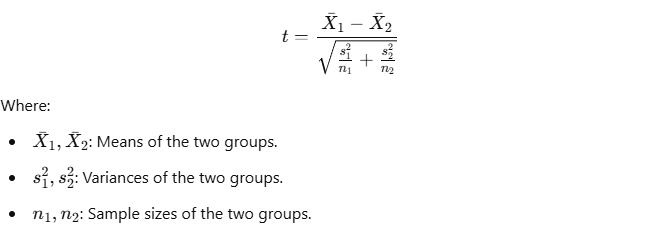



In [158]:
from scipy.stats import ttest_ind
df['Is_All_or_Beginner'] = df['level'].apply(
    lambda x: 1 if x in ["All Levels", "Beginner Level"] else 0
)
group1 = df[df['Is_All_or_Beginner'] == 1]['num_subscribers']
group2 = df[df['Is_All_or_Beginner'] == 0]['num_subscribers']
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

print("Average Subscribers (All or Beginner):", group1.mean())
print("Average Subscribers (Others):", group2.mean())

T-statistic: 3.817696712673849
P-value: 0.00013692304519877355
Average Subscribers (All or Beginner): 3428.2335104720223
Average Subscribers (Others): 1653.8643006263048


Since the p-value is much less than 0.05, we reject the null hypothesis for this test. This indicates that courses categorized as "Beginner" or "All Levels" attract significantly more subscribers compared to other levels. The average subscribers for "Beginner" or "All Levels" are 3428, which is considerably higher than the average of 1654 for other levels.

#### ANOVA

ANOVA tests whether there are significant differences in means among multiple groups (e.g., All Levels, Beginner, Intermediate, and Expert Levels).

**Step**



*   Calculates the ratio of variance between groups to variance within groups.
*   A high F-statistic indicates that the group means differ more than what would be expected by random chance.


**Formula**

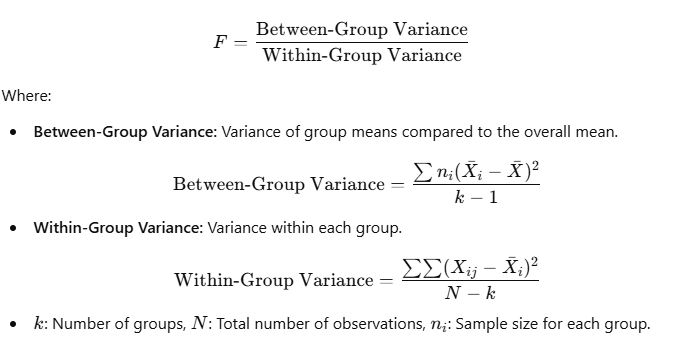



In [159]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(*[group['num_subscribers'].values
                            for _, group in df.groupby('level')])

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_val}')

F-statistic: 5.451023861997811
P-value: 0.000975373987395026


The ANOVA results also show a p-value less than 0.05 (p-value = 0.000975), leading us to reject the null hypothesis. This suggests that there is a statistically significant difference in the mean number of subscribers across different course levels.


#### Tukey's HSD

Tukey’s HSD is a post-hoc test used after ANOVA to identify which specific group pairs have statistically significant differences in means.

**Step**


*   Compares every pair of group means image.png using the critical difference (HSD).
*   Adjusts for multiple comparisons to control the overall Type I error rate.


**Formula**

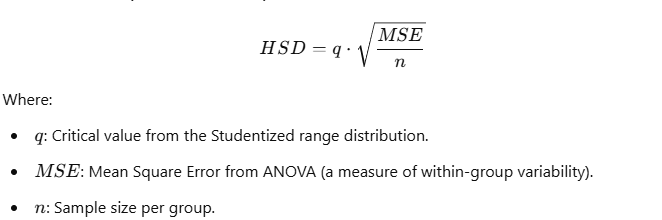

In [160]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(df['num_subscribers'], df['level'])
print(tukey_result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
    group1           group2        meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------------------------
    All Levels     Beginner Level  -394.3708 0.6582 -1275.4846   486.743  False
    All Levels       Expert Level -2719.3501 0.1374 -5968.8137  530.1136  False
    All Levels Intermediate Level -1822.3162  0.002 -3133.9712 -510.6611   True
Beginner Level       Expert Level -2324.9793 0.2615 -5598.9594  949.0008  False
Beginner Level Intermediate Level -1427.9454 0.0375 -2799.2115  -56.6792   True
  Expert Level Intermediate Level   897.0339 0.9065  -2518.083 4312.1508  False
-------------------------------------------------------------------------------


The Tukey's HSD test indicates that the "Intermediate Level" courses have significantly fewer subscribers compared to "Beginner" or "All Levels." However, the differences between other pairs (e.g., "All Levels" vs. "Beginner" or "Expert Level") are not significant.

#### Histogram

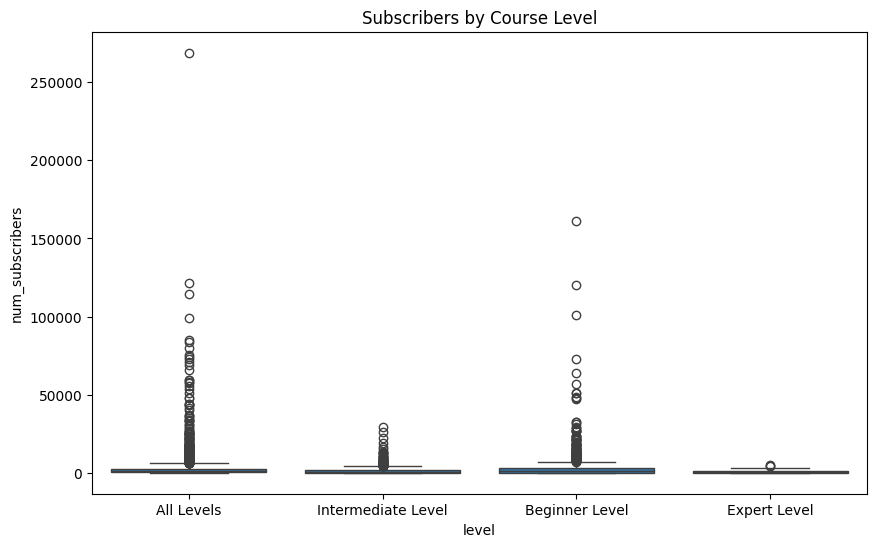

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='level', y='num_subscribers', data=df)
plt.title('Subscribers by Course Level')
plt.show()

A histogram visualizing subscribers by course level provides a clear representation of how the number of subscribers is distributed across different course levels

### Analyze based on the price

#### ANOVA


In [162]:
bins = [0, 50, 100, 150, 200]
labels = ['Low', 'Medium', 'High', 'Very High']

f_stat, p_value = f_oneway(*[group['num_subscribers'].values
                              for _, group in pd.DataFrame({
                                  'price_category': pd.cut(df['price'], bins=bins, labels=labels),
                                  'num_subscribers': df['num_subscribers']
                              }).groupby('price_category', observed=False)]) # Add observed=False

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 65.4958572704405
P-value: 3.7273900094769704e-41


The p-value is extremely small (far less than the typical threshold of 0.05). This indicates that there is a very strong statistical significance, meaning the price has a significant effect on the number of subscribers.

#### Linear Regression

Consider a pair of variables, one of which is called the input variable and the other the response variable. Suppose that for a specified value x of the input variable the value of the response variable Y can be expressed as

Y= α + βx + e

The quantities α and β are parameters. The variable e, called the random error, is assumed to be a random variable having mean 0.

**Definition: The relationship between the response variable Y and the input variable x specified in the preceding equation is called a simple linear regression.**

Ross, S. M. (2017). Chapter 12 - Linear regression. In Introductory statistics (4th ed., pp. 519–584). Academic Press. https://doi.org/10.1016/B978-0-12-804317-2.00012-6

In [163]:
import statsmodels.api as sm
X = sm.add_constant(df['price'])
y = df['num_subscribers']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        num_subscribers   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.499
Date:                Wed, 11 Dec 2024   Prob (F-statistic):            0.00207
Time:                        11:45:55   Log-Likelihood:                -38902.
No. Observations:                3678   AIC:                         7.781e+04
Df Residuals:                    3676   BIC:                         7.782e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2674.7400    230.720     11.593      0.0

In the analysis above, the p-value is 0.00207, which corresponds to the probability of observing the F-statistic

value (or a more extreme value) under the null hypothesis that the independent variable (price) has no effect on the dependent variable (number of subscribers).

This indicates that there is a **significant relationship between price and the number of subscribers** in a continuous context.

But, we can see the R-squared too, which is **0.003**.

A R-squared between 0.50 to 0.99 is acceptable in social science research especially when most of the explanatory variables are statistically significant. The only caveat to this is that the high R- squared should not be caused by spurious causation or multi-collinearity among the explanatory variables. (https://mpra.ub.uni-muenchen.de/115769/)

A low R-squared value suggests that the independent variable(s) in the regression model are not effectively explaining the variation in the dependent variable. This could be due to factors such as missing relevant variables, non-linear relationships, or inherent variability in the data that cannot be captured by the model.

A significant p-value does not imply causation, nor does it validate the model itself. It simply indicates that the observed effect is unlikely to be due to chance, under the assumptions of the model.

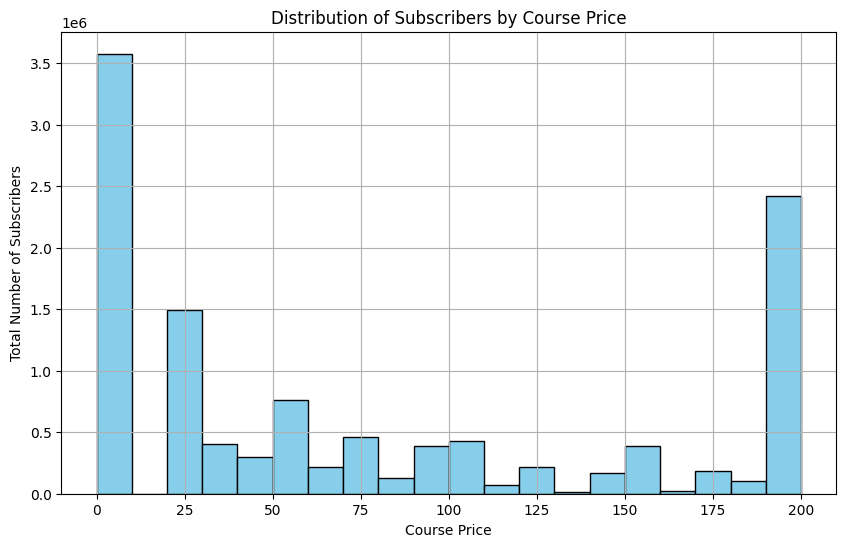

In [164]:
price_subscribers = df.groupby(['price'])['num_subscribers'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.hist(price_subscribers['price'], weights=price_subscribers['num_subscribers'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Subscribers by Course Price')
plt.xlabel('Course Price')
plt.ylabel('Total Number of Subscribers')
plt.grid(True)
plt.show()

### The relationship between price and course level in increasing the number of subscribers

#### Multiple regression

In [165]:
from sklearn import linear_model
from sklearn.metrics import r2_score

level_mapping = {
    'Beginner Level': 0,
    'Expert Level': 1,
    'Intermediate Level': 2,
    'All Levels': 3
}
df['level'] = df['level'].map(level_mapping)
X = df[['num_subscribers', 'level']]
y = df['price']

regr = linear_model.LinearRegression()
regr.fit(X, y)
r2 = regr.score(X, y)
print("R-squared:", r2)

correlation_matrix = df[['num_subscribers', 'level']].corr()
print("Correlation matrix:\n", correlation_matrix)

R-squared: 0.017806780354324037
Correlation matrix:
                  num_subscribers    level
num_subscribers          1.00000  0.01874
level                    0.01874  1.00000


Based on that calculation, with the R-squared is close to 0, which is almost no correlation between them with the target variable: price.

**This is the visualization of price and course level with the amount of subscribers**

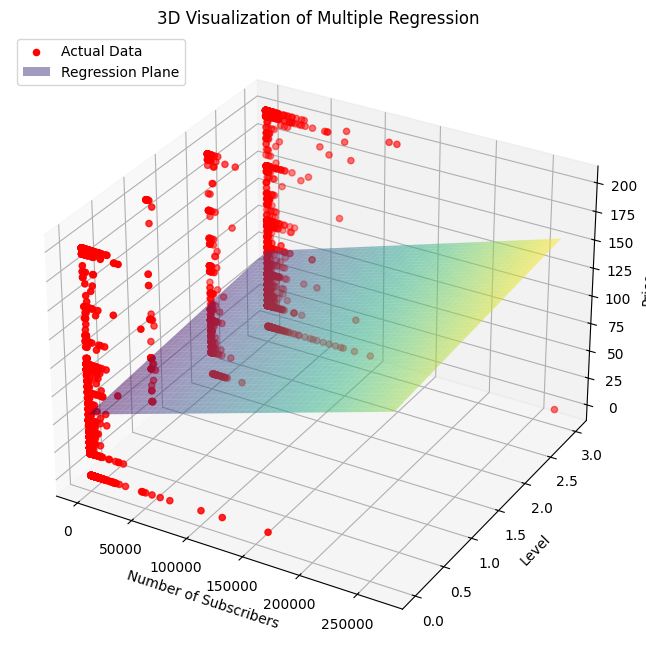

In [166]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X_num_subscribers = df['num_subscribers']
X_level = df['level']
y = df['price']

x1 = np.linspace(X_num_subscribers.min(), X_num_subscribers.max(), 100)
x2 = np.linspace(X_level.min(), X_level.max(), 100)
x1_grid, x2_grid = np.meshgrid(x1, x2)
y_pred_grid = regr.intercept_ + regr.coef_[0] * x1_grid + regr.coef_[1] * x2_grid

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_num_subscribers, X_level, y, color='red', label='Actual Data')  # Actual points
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5, cmap='viridis', label='Regression Plane')  # Regression plane

ax.set_xlabel('Number of Subscribers')
ax.set_ylabel('Level')
ax.set_zlabel('Price')
ax.set_title('3D Visualization of Multiple Regression')
plt.legend(loc='upper left')

plt.show()

## Conclusion

Hypothesis Testing and Analyze

**1. Course Level and Its Effect on the Number of Subscribers**

$H_{0_1}$: The level of a course has no effect on the number of subscribers.

$H_{1_1}$: Courses that include beginner or all levels attract significantly more subscribers than other courses.

Analysis using t-test and ANOVA confirmed that course level significantly affects the number of subscribers. Tukey's HSD used for Post-hoc analysis for reveal significant differences between all-level(beginner, expert, intermediate, all level).

Based on that analysis, the null hypothesis is rejected. Because course as "Beginner" or "All Levels" tend to attract significantly more subscribers compared to other course levels.

**2. Course Price and Its Effect on the Number of Subscribers**

$H_{0_2}$: Course prices have no effect on the number of subscribers.

$H_{1_2}$: Courses with lower prices attract significantly more subscribers than courses with higher prices.

Statistical tests demonstrated a significant relationship between price and the number of subscribers, with a p-value of less than 0.05. However, the low R-squared value indicates that course price alone explains only a small proportion of the variation in the number of subscribers.
Moreover, higher-priced courses sometimes attract more subscribers, contradicting the assumption of a simple negative relationship between price and subscriber count.

With that, we reject both the null and alternative hypothesis for this. Although course price influences the number of subscribers, its effect is complex and requires further analysis to account for other contributing factor.

**3. Relationship Between Course Level and Price in Increasing Subscribers.**

$H_{0_3}$: There is no significant relationship between course level and course price in increasing the number of subscribers.

$H_{1_2}$: There is a significant relationship between course level and course price in increasing the number of customers.

The analysis showed that the correlation between course level and price in relation to the number of subscribers is negligible, as indicated by the low R-squared value.

In conclusion, we accept the null hypothesis. There is no significant relationship between course level and price in increasing the number of subscribers.

**Key Insight and Recomendation**

Courses categorized as “Beginner” or “All Levels” attract significantly more subscribers, so focusing on creating and promoting courses in these categories can help maximize engagement. Meanwhile, “Intermediate” and “Expert” level courses have fewer subscribers, suggesting a need for further exploration of factors like course content, teaching style, or audience preferences to better cater to advanced learners. Identifying and addressing these factors could open opportunities to attract more subscribers at higher levels, while new hypotheses about the appeal of specific topics or formats could provide valuable insights for course design and marketing.

In [ ]:
%pip install pandoc
!apt-get update
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra

zsh:1: command not found: apt-get
zsh:1: command not found: apt-get
zsh:1: command not found: apt-get


In [ ]:
!jupyter nbconvert 'content/drive/MyDrive/final_project.ipynb' --to pdf